In [1]:
# load and the test weekly fpl scrape
season="2019-20"
gw=17
model_type="lr"

In [2]:
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import pickle

In [3]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [4]:
cwd = os.getcwd()

In [5]:
random_state = np.random.seed(24)

In [6]:
X_train = pd.read_csv("x-train.csv");
X_test = pd.read_csv("x-test.csv");

In [7]:
y_train = pd.read_csv("y-train.csv");
y_test = pd.read_csv("y-test.csv");

In [8]:
os.chdir(os.path.join(os.getcwd(), "..", "model", season, str(gw)))

In [9]:
# coefficients = pd.read_csv("{}-model-coefficients.csv".format(model_type))

In [10]:
# top_coefficients = list(coefficients.sort_values(["Coefficients"], ascending=False).head(60)["Feature"])

In [11]:
# X_train = X_train[top_coefficients]

In [12]:
# X_test = X_test[top_coefficients]

In [13]:
regressor = LinearRegression(normalize=True)

In [14]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(regressor.coef_[0, ])})

In [16]:
coefficients.sort_values(["Coefficients"], ascending=False)

,Feature,Coefficients
42,penalties_missed_pgw,4.080641
49,red_cards_pgw,2.223840
39,own_goals_pgw,0.873194
50,red_cards_rlf,0.764371
40,own_goals_rlf,0.461604
0,at_home,0.431476
7,promoted_ts,0.333073
27,goals_scored_rlf,0.297285
48,player_form,0.272711
38,opponent_form,0.262070


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
def getInRange(actual, predicted, lower_bound=0, upper_bound=1):
    return ((actual - predicted) >= lower_bound) and ((actual - predicted) <= upper_bound)

In [19]:
pred_df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})

In [20]:
pred_df["in_range"] = pred_df.apply(lambda row: getInRange(row["Actual"], row["Predicted"], 0, 1), axis=1)

In [21]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.10


In [22]:
pred_df.head(25)

,Actual,Predicted,in_range
0,4.0,5.311657,False
1,7.0,4.802324,False
2,8.0,4.439987,False
3,5.0,2.569280,False
4,8.0,4.861370,False
5,7.0,5.848995,False
6,6.0,5.309213,True
7,9.0,5.888130,False
8,9.0,4.087896,False
9,8.0,5.157836,False


In [23]:
test_df = pred_df.head(25)

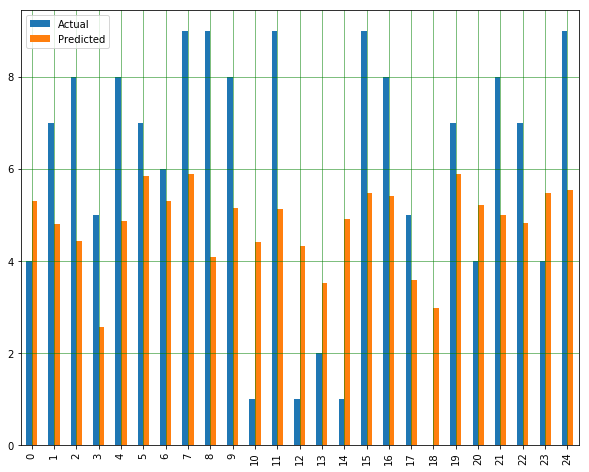

In [24]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3099252790756544
R2 score: 0.12627721591262775
Mean Squared Error: 7.131280405812504
Root Mean Squared Error: 2.6704457316733667


In [26]:
filename = '{}-model.pkl'.format(model_type)

In [27]:
gw_dir = os.path.join(os.getcwd(), "..", "model", season, str(gw))

In [28]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [29]:
os.chdir(gw_dir)

In [30]:
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)

In [31]:
coefficients.to_csv("{}-model-coefficients.csv".format(model_type), index=False)